In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from fastai.vision import *

There are 2 types of bounding box descriptions, *hw* and *bb*:

$$
hw \rightarrow (x, y, \Delta x, \Delta y) 
$$

$$
bb \rightarrow (y, x, y + \Delta y - 1, x + \Delta x - 1)
$$

$x$ and $y$ are the x and y coordinates of the top-left corner of the bounding box, respectively.  $\Delta x$ is the width of the bounding box, and $\Delta y$ is the height of the bounding box.

In [13]:
def hw_bb(bb): return np.array([bb[1], bb[0], bb[3] + bb[1] - 1, bb[2] + bb[0] - 1])
def bb_hw(a): return np.array([a[1],a[0],a[3]-a[1]+1,a[2]-a[0]+1])

In [40]:
PATH = Path('/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/data/busroutes')
JPEG_PATH = PATH/'route_number'

Load the json file produced by the annotation tool VIA: http://www.robots.ox.ac.uk/~vgg/software/via/

In [3]:
trn_j = json.load((PATH/'busroute_numbers.json').open())

In [4]:
trn_j.keys()

dict_keys(['_via_settings', '_via_img_metadata', '_via_attributes'])

In [7]:
trn_j['_via_img_metadata'].keys()

dict_keys(['IMG_20190428_113953.jpg4143595', 'IMG_20190428_114046.jpg2943572', 'IMG_20190429_163906.jpg4105089', 'IMG_20190429_163908.jpg3447788', 'IMG_20190429_163911.jpg3429226'])

In [10]:
trn_j['_via_img_metadata']['IMG_20190428_113953.jpg4143595']

{'filename': 'IMG_20190428_113953.jpg',
 'size': 4143595,
 'regions': [{'shape_attributes': {'name': 'rect',
    'x': 1984,
    'y': 455,
    'width': 767,
    'height': 481},
   'region_attributes': {'digit': '', 'routenumber': '941'}},
  {'shape_attributes': {'name': 'rect',
    'x': 138,
    'y': 2992,
    'width': 563,
    'height': 435},
   'region_attributes': {'routenumber': '916'}}],
 'file_attributes': {}}

In [62]:
def region_bbox(r):
    specs = ('x', 'y', 'width', 'height')
    return hw_bb([r['shape_attributes'][spec] for spec in specs])

def region_cat(r):
    return r['region_attributes']['routenumber']

trn_fns = {}
trn_anno = collections.defaultdict(list)
for i, d in enumerate(trn_j['_via_img_metadata'].values()):
    trn_anno[i] = [(region_bbox(r), region_cat(r)) for r in d['regions']]
    trn_fns[i] = d['filename']

In [63]:
cats = set(annot[-1] for annots in trn_anno.values() for annot in annots)
cats = {i: busnumber for i, busnumber in enumerate(cats)}
cat2id = {cat:i for i, cat in cats.items()}

In [64]:
for imgid, annots in trn_anno.items():
    trn_anno[imgid] = [(annot[0], cat2id[annot[-1]]) for annot in annots]

In [65]:
trn_anno

defaultdict(list,
            {0: [(array([ 455, 1984,  935, 2750]), 3),
              (array([2992,  138, 3426,  700]), 6)],
             1: [(array([ 378,  527,  837, 1380]), 6),
              (array([ 491, 1463,  955, 2183]), 1),
              (array([ 609, 2307, 1073, 3032]), 0),
              (array([ 742, 3089, 1160, 3814]), 8),
              (array([1181,  573, 1661, 1370]), 3),
              (array([1279, 1514, 1764, 2311]), 2),
              (array([1386, 2383, 1861, 3159]), 7),
              (array([1488, 3196, 1922, 3875]), 4),
              (array([2291, 3294, 2740, 4004]), 5)],
             2: [(array([1161, 2051, 1518, 2618]), 0),
              (array([2777, 2056, 3154, 2582]), 1)],
             3: [(array([1202, 1805, 1697, 2540]), 0),
              (array([1217, 4158, 1456, 4556]), 2),
              (array([3028, 4168, 3395, 4581]), 3)],
             4: [(array([1447, 1872, 1952, 2618]), 1),
              (array([3115, 4184, 3457, 4587]), 5)]})

In [66]:
trn_ids = list(trn_anno.keys())

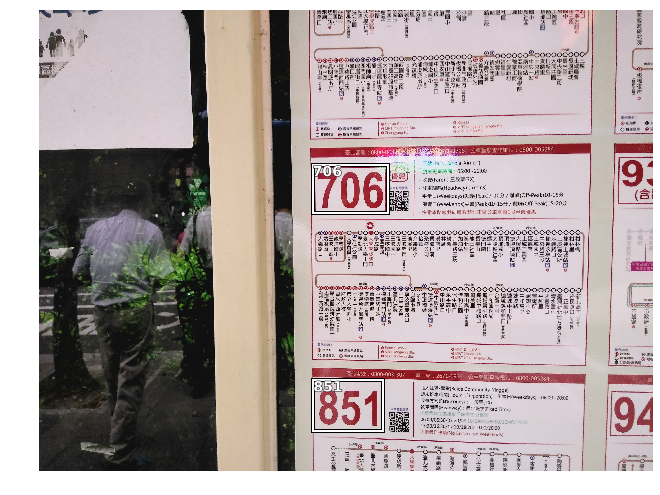

In [67]:
i = trn_ids[2]
img = open_image(JPEG_PATH/trn_fns[i])
bboxes = [o[0] for o in trn_anno[i]]
classes = [cats[o[1]] for o in trn_anno[i]]
labels = range(len(classes))
labels, classes
bbox = ImageBBox.create(*img.size, bboxes=bboxes, classes=classes, labels=labels)
img.show(y=bbox, figsize=(11, 11))

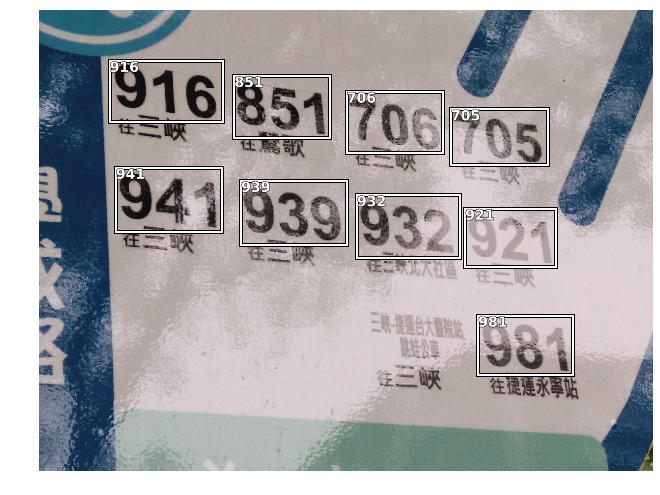

In [70]:
i = trn_ids[1]
img = open_image(JPEG_PATH/trn_fns[i])
bboxes = [o[0] for o in trn_anno[i]]
classes = [cats[o[1]] for o in trn_anno[i]]
labels = range(len(classes))
labels, classes
bbox = ImageBBox.create(*img.size, bboxes=bboxes, classes=classes, labels=labels)
img.show(y=bbox, figsize=(11, 11))

In [72]:
img.size

torch.Size([3456, 4608])